In [1]:
# 1. importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Importer les jeux de données
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset=pd.read_csv('housing.csv',header=None, delimiter=r"\s+", names=column_names)
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
y1=dataset.iloc[:,-1].values.reshape(-1,1)

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

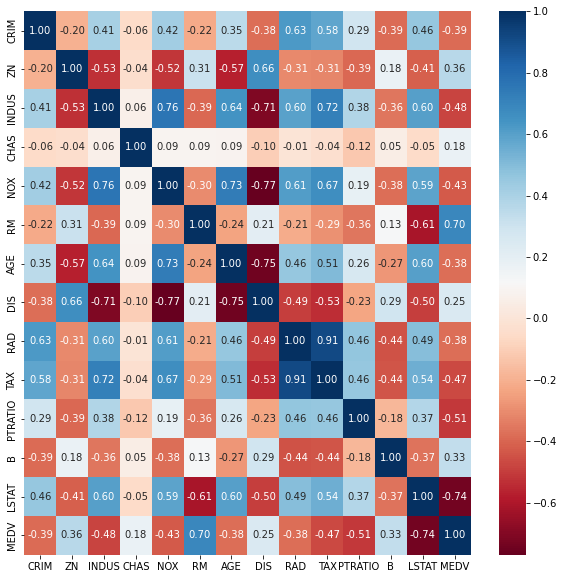

In [4]:
#3. Etude de la corrélation et de la multicolinéarité
corr = dataset.corr()
ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")



In [5]:
# 5.Diviser le dataset en training set et Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)


In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [7]:
# 7.1 Construction du modèle de forêt aléatoire et du gradient Boosting
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
model1=RandomForestRegressor()
rdf=model1.fit(x_test,y_test)


In [8]:
Y_pred_model1=model1.predict(x_test)
R2_model1= r2_score(y_test,Y_pred_model1)
rmse_model1=(np.sqrt(mean_squared_error(y_test,Y_pred_model1)))

In [9]:
print (Y_pred_model1)
print(R2_model1)
print(rmse_model1)
print(model1.feature_importances_)

[22.669 41.837 22.656  9.434 21.097 19.855 21.085 19.84  17.155 19.373
  8.93  16.58  14.922  9.787 46.397 30.205 22.256 32.425 28.446 20.863
 23.873 19.039 19.477 26.747 19.827 21.264 19.884 17.976 39.488 18.39
 15.311 19.696 21.311 20.204 23.529 16.949  6.986 44.167 14.844 13.874
 23.422 19.991 20.748 14.597 19.199 21.824 20.206 17.416 13.577 25.909
 16.215 21.96  22.848 41.249 16.757 21.222 18.021 18.173 16.832 20.75
 19.53  20.788 31.66  31.796 19.783 29.77  15.846 16.199 22.068 22.206
 20.685 22.017 25.539 30.656 24.797  8.236 45.615 23.494 22.614 19.104
 23.898 17.853 27.851 44.684 47.529 23.542 21.545 12.853 24.153 20.078
 18.908 13.894 21.793 25.057 15.48  23.09  23.869 24.064 15.01  19.075
 25.756 20.104]
0.9558586683386895
1.8958796732108576
[0.05625156 0.00318103 0.00571364 0.00095247 0.01531573 0.33526398
 0.02713304 0.17970087 0.01484411 0.00523884 0.00629836 0.0252932
 0.32481318]


In [10]:
# 8.1. Interprétabilité Local des modèles avec LIME(Local Interpretable Model-Agnostic Explanations)
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(x_train,mode='regression',feature_names=x.columns)
j=0

In [11]:
# B.Explication d'une instance du modèle RandomForest avec LIME
expRFD=explainer.explain_instance(x_test[j],rdf.predict,num_features=5)
expRFD.show_in_notebook(show_table=True)

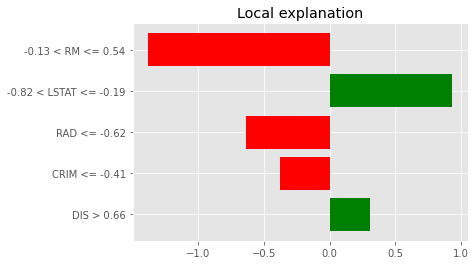

In [32]:
# method to generate a bar chart of feature contribution for this sample
with plt.style.context("ggplot"):
    expRFD.as_pyplot_figure()

In [12]:
# C.
from sklearn.ensemble import GradientBoostingRegressor
model3= GradientBoostingRegressor()
xgb=model3.fit(x_test,y_test)
Y_pred_model3=xgb.predict(x_test)
expXGB=explainer.explain_instance(x_test[j],xgb.predict,num_features=5)
expXGB.show_in_notebook(show_table=True)

In [16]:
import shap
shap.initjs()

In [17]:
# 8.2. Interprétabilité Local du modèle ML avec SHAPE
# D.Explication d'une instance du modèle RandomForest avec SHAPE
explainerRDF=shap.TreeExplainer(rdf)
shap_values_RDF_test=explainerRDF.shap_values(x_test)
#shap_values_RDF_train=explainerRDF.shap_values(x_train)
shap.force_plot(explainerRDF.expected_value,shap_values_RDF_test[j],x_test[[j]])

In [18]:
# 8.2. Interprétabilité Local du modèle ML avec SHAPE
# E.Explication d'une instance du modèle Gradient Boosting avec SHAPE
from sklearn.ensemble import GradientBoostingRegressor
model3= GradientBoostingRegressor()
xgb=model3.fit(x_test,y_test)
import shap
explainerXGB=shap.TreeExplainer(xgb)
shap_values_RXGB_test=explainerXGB.shap_values(x_test)
shap.force_plot(explainerXGB.expected_value,shap_values_RDF_test[j],x_test[[j]])